# A comprehensive introduction to Neural Networks
### From zero to a working implementation
![alt text](imgs/nn.jpg)
<center><a href="https://www.flickr.com/photos/mikemacmarketing/42271822770/in/photostream/">Image</a> by <a href="https://www.flickr.com/photos/mikemacmarketing/">Mike MacKenzie</a> at Flickr</center>

Artificial neural networks, the subject of our article, are mathematical models that are inspired by biological neural networks and are attempting to imitate them. As biological neural networks are a combination of more neurons aimed at a specific task, artificial neural networks are a combination of more linear models often called artificial neurons or perceptrons. If you want to find out more about a perceptron, which is the simplest neural network, you can read more about it [here](https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1).   
  
Neural networks are usually represented visually as a graph-like structure like the one below:  
  
<img src="imgs/neural_network.png" width="512" />  
  
[Image](https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg) by Glosser.ca / CC BY-SA at [Wikimedia Commons](https://commons.wikimedia.org/)  
  
Above is represented a neural network with 3 layers: input, hidden, and output layer, consisting of 3, 4, and 2 neurons.  
The input layer has as many nodes as the number of features of your dataset. For the hidden layer you are free to choose how many nodes you want and you can use more than one hidden layer. Those networks with more than one hidden layer are named **deep neural networks** and are the main characters of the field of **deep learning**. Networks with just one hidden layer are usually called **shallow neural networks**. The output layer should have as many neurons as the number of variables you want to predict.  

There are more kinds of neural networks: convolutional, recurrent, spiking neural networks, to name a few. But here we will discuss only about simple feed-forward neural networks or multi-layer perceptrons.  
  
Neural networks can be used in a wide range of problems, for both classification and regression tasks. For simplicity, in the most part of the article we will focus only on the classification task and, as we will see later, the things that we learn through this article about neural networks can be easily translated to regression problems. 
  
Each neuron in the network, except those in the input layer, can be thought of as being a linear classifier that takes as input all the outputs of the neurons in the previous layer and computes a weighted sum of those plus a bias term. Then, the neurons in the next layer will take as input the values computed by the previous layer of linear classifiers, then compute a weighted sum of those, and so on. Our hope is that, by combining linear classifiers in this way, we are able to construct more complex classifiers that can represent non-linear patterns in our data.  
  
Let's take a look at the following example:  
<img src="imgs/plot1.png" width="512" />  
  
This dataset is clearly not linearly separable, we can not separate one class from the other by a line. But we can do this separation by using 2 lines as the decision boundary.  
<img src="imgs/plot2.png" width="512" />  
  
So, we may think that 2 intermediate neurons would do the job. These 2 neurons will learn the 2 separation lines in the image above. And then we will need a output neuron that will take as input these 2 previous neurons, and then it will be able to do the classification right.  
<img src="imgs/example1.png" width="512" />  
  
In order for the last neuron to do the classification right, it needs that the outputs of the n1 and n2 hidden neurons to be linearly separable if we plot them in a 2d plane. The 2 lines plotted above have the equations:  
  
$$
\begin{align}
x_2 &= 0.32 \cdot x_1 - 0.5\\
x_2 &= -0.32 \cdot x_1 + 0.6
\end{align}
$$  
  
This means that the 2 hidden neurons are computing the following linear combinations of the input x1 and x2:  
  
$$
\begin{align}
n_1 &= 0.32 \cdot x_1 - x_2 - 0.5\\
n_2 &= -0.32 \cdot x_1 - x_2 + 0.6
\end{align}
$$  
  
Let's plot now n1 and n2 and see if they helped us.  
  
<img src="imgs/plot3.png" width="512" />  
  
And we are disappointed by or little neural network. The outputs of n1 and n2 are still not linearly separable and thus the output neuron can't do the classification right.  
So, what is the problem? The thing is that any linear combination of linear functions is still linear, and it is not hard to convince yourself on a piece of paper that this is true. So, no matter how many layers or how many neurons we use, the way we proceeded so far our neural network will still be just a linear classifier.  
We need something more. We need to take the weighted sum computed by each neuron and pass it through a non-linear function, then consider the output of this function as the output of that neuron. These functions are called **activation functions** and as you can see in our example they are very important in allowing a neural network to learn complex patterns in data. It has been proven[1] that a neural network with 2 layers (except the input one) and non-linear activation functions is able to approximate any function, provided that it has a large enough number of neurons in those layers. So, if only 2 layers are enough, why are people using much deeper networks nowadays? Well, just because these 2-layer networks are "able" to learn anything, it doesn't mean that they are easy to optimize. In practice, if we give our network **overcapacity**, they will give us good enough solutions even if they are not optimized as good as they could.  
  
There are more kinds of activation functions, two of them we want to use in the example above. These are ReLU (**Re**ctified **L**inear **U**nit) and tanh (hyperbolic tangent) and are shown below.  
  
$$relu(x) = max(0, x)$$
<img src="imgs/relu.png" width="512" />  
  
$$tanh(x) = \frac{e^{2x}-1}{e^{2x}+1}$$
<img src="imgs/tanh.png" width="512" />
  
Another way to think about neural networks is that they are trying to learn both the classification and the feature representations at the same time. If you read my article about [perceptron](https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1), you saw towards the end of it how we used a linear classifier to solve a non-linear classification problem by adding non-linear features to our input vector. But how would you always know what extra features to add to your input vector in order to obtain good results. Neural networks attempt to solve this problem by also learning what such feature representations would be good. In the hidden layers a neural network actually learns the best representation of your input data in order to perform well in its last layer where the actual classification takes place.  
  
Now, let's continue with our example. What would happen if we use the ReLU activation in our example? Below are plotted the outputs of neurons n1 and n2 after the ReLU activation is applied.  
  
<img src="imgs/plot4_relu.png" width="512" />  
  
Now our two classes of points can be separated by a line, and thus the output neuron can classify them correctly.  
<img src="imgs/plot5_relu_boundary.png" width="512" />  
  
A similar thing happens if we use the tanh activation, but this time our points are separated even better by a bigger margin.  
<img src="imgs/plot6_tanh.png" width="512" />  
  
Again, the output neuron can classify the points correctly.  
<img src="imgs/plot7_tanh_boundary.png" width="512" />  
  
## ...
  
In my opinion, the common visual representation of a neural network, that nasty graph-like structure, can be a little confusing. Especially if you want to implement it, it is harder to think about what you need to do with all those connections and weights floating around. Thinking at parameter-level can be cumbersome, but thinking at a higher level in terms of vector and matrix operations that are done in the network is clearer, at least for me. Thinking about neural networks as a composition of functions, a chain of vector functions, has helped me in the implementation that I did, and I hope it will also help you. Take a look at the image below:  
  
<img src="imgs/neural_network_function_composition.png" width="800" />  
  
If we represent the input and output values of each layer as vectors, the weights as matrices, and biases as vectors, then we get the above flattened view of a neural network which is just a sequence of vector function applications. That is functions that take vectors as input, do some transformation on them, and them output other vectors. In the image above, each line represents a function, which can be either a matrix multiplication plus a bias vector, or an activation function. And the circles represent the vectors on which these functions operate. For example, we start with the input vector, then we feed it into the first function, which computes linear combinations of its components, then we obtain another vector as output. This last vector we feed as input to the activation function, and so on until we get to the last function in our sequence. The output of this last function will be the predicted value of our network.  
  
This representation is also closer to what we actually have to implement. In order to implement a neural network we don't actually need to store that graph that is usually represented in images. All a neural network is doing for a living is **matrix operations**, both for making predictions and for training.  
  
We have seen how a neural network gets its output, which we are interested of, it just passes its input vector through a sequence of functions. But these functions depend on some parameters: the weights and biases.  
  
*How do we actually learn* those parameters in order to obtain good predictions?  
  
Well, let's recall what a neural network actually is: it's just a function, a big function composed of smaller ones that are applied in sequence. This function has a set of parameters that, because at first we have no idea what they should be, we just initialize them randomly. So, at first our network will give us just random values. How we can improve them? Before attempting to improve them we first need a way of evaluating the performance of our network. How we are supposed to improve the performance of our model if we don't have a way to measure how good or how bad is it doing? For that we need to come up with a function that takes as parameters the predictions of our network and the true labels in our dataset, and to give us a number which represents the performance of our network. Then we can turn the learning problem into an optimization problem of finding the minimum or maximum of this function. In the machine learning community, this function usually measures how bad our predictions are, hence it is named a **loss function**. And our problem is to find the parameters of our network that minimizes this loss function.  
  
## Stochastic gradient descent

You may be familiar with the problem of finding the minimum of a function from your calculus class. There you usually take the gradient of your function, set it equal to 0, find all the solutions (also called critical points), and then choose among them the one that gives your function the smallest value. And that's the global minimum. Can we do the exact same thing in minimizing our loss function? Not really. The problem is that the loss function of a neural network is not as nice and compact as those you usually find in calculus textbooks. It is a very complicated function with thousands, hundreds of thousands or even millions of parameters. It may be even impossible to find a closed-form solution to this problem. This problem is usually approached by iterative methods, methods that don't try to find a direct solution, but instead they start with a random solution and try to improve it a little bit in each iteration. Eventually, after a large number of iterations we will get a pretty good solution.  
  
One such iterative method is **gradient descent**. As you may know, the gradient of a function gives us the direction of the steepest ascent, and if we take the negative of the gradient it will give us the direction of the steepest descent, that is the direction in which we can get the fastest towards a minimum. So, at each iteration, also called epoch, we compute the gradient of the loss function and subtract it (multiplied by a factor called *learning rate*) from the old parameters in order to get the new parameters of our network.  
  
<img src="imgs/gd_update.png" width="800" />  
  
Where theta represents a vector containing all the network's parameters.  
  
In the standard gradient descent method the gradient is computed taking into account the whole dataset. Usually this is not desirable as it may be computationally expensive. In prctice the dataset is randomly divided into more chunks called batches, and an update is made for each one of these batches. This is called **stochastic gradient descent**.  
  
The above update rule takes into account at each step only the gradient evaluated at the current position. In this way, the trajectory of the point that moves on the surface of the loss function is sensible to any perturbation. Sometimes we may want to make this trajectory more robust. For that we use a concept inspired from physics: **momentum**. The idea is that when we do the update to also take into consideration previous updates, that accumulates into a variable $\Delta\theta$. If more updates are done in the same direction, then we will go "faster" into that direction and won't change our trajectory by any small perturbation. Think about this like velocity.  
  
$$
\begin{align}
\Delta\theta^{(t+1)} &= \alpha \cdot \Delta\theta^{(t)} - \eta \cdot \nabla L\\
\theta^{(t+1)} &= \theta^{(t)} + \Delta\theta^{(t+1)}
\end{align}
$$  
  
Where $\alpha$ is a non-negative factor that determines the contribution of past gradients. When it is 0 we simply don't use momentum.


## Backpropagation

How do we actually compute the gradient? Recall that a neural network, and thus the loss function,  is just a composition of functions. How we can compute partial derivatives of composite functions? Using chain rule. Let's look at the following image:  
  
<img src="imgs/backprop.png" width="800" />  
  
If we want to compute the partial derivatives of the loss w.r.t. (*with respect to*) the weights of the first layer: we take the derivative of the first linear combination w.r.t. the weights, then we multiply with the derivative of the next function (the activation function) w.r.t. the output from the previous function, and so on until we multiply with the derivative of the loss w.r.t. the last activation function. What if we want to compute the derivative w.r.t. the weights of the second layer? We have to do the same process, but this time we start with the derivative of the second linear combination function w.r.t. its weights, and after that the rest of the terms that we have to multiply with were also present when we computed the derivative of the weiths of the first layer. So, instead of computing these terms over and over again, we will go **backwards**, hence the name **backpropagation**. We will first start by computing the derivative of the loss w.r.t. the output of our network, and then propagate these derivatives backwards towards the first layer by maintain a running product of derivatives. Note that there are 2 kinds of derivatives that we take: one in which we compute the derivative of a function w.r.t. its input. These we multiply to our product of derivatives and have the purpose to keep track of the error of the network from its output to the current point in which we are in the algorithm. The second kind of derivatives are those that we take w.r.t. the parameters that we want to optimize. These we don't multiply with the rest of our product of derivatives, instead we store them as part of the gradient that we will use later to update the parameters. So, while backpropagation, when we encounter functions that don't have learnable parameters (like activation functions) we take derivatives only of the first kind, just to propagate the errors backwards. But, when we encounter functions that do have learnable parameters (like the linear combinations, we have there the weights and biases that we want to learn) we take derivatives of both kinds: the first one w.r.t. its input for error propagation, and the second one w.r.t. its weights and biases, and store them as part of the gradient. We do this process starting from the loss function and until we get to the first layer where we don't have any learnable parameters that we want to add to the gradient. This is the backpropagation algorithm.  
  
## Overcapacity

Before moving next, I wnat to talk a little bit about overcapacity in neural networks. Recall our previous example:  
  
<img src="imgs/plot2.png" width="800" />  
  
As you can see the minimum number of neurons in the hidden layer that are needed to solve this classification task is 2, one for each of the 2 lines above. In neural networks it is a good idea to add some overcapacity, that is to add more neurons and/or layers than the minimum needed to solve that particular problem. That is because adding more parameters will make the optimization problem easier. In the example above, if we use only 2 hidden neurons we will need each one of them to learn a line that is "almost perfect" in order for the final result to be good. But if we give more freedom to our network and add more neurons in the hidden layer, they will not need to be perfect. We will be able to get good results if most of them will do at least something useful to our classification task. And then, we can think of the last neuron as averaging the decision boundary of each them.  
  
Another way to think about why adding more parameters may make the optimization task easier is by imagining what happens with the loss function's "surface" when we add more parameters. In the 2d case there are only 2 dirctions in which we can move our (single) parameter, and if in both of these directions the height of the loss function is bigger than at the current point, then we are stuck in a local minimum, and we may miss completely the global minimum. Now, let's imagine that we add one more parameter, and thus our plot becomes a surface in 3d space. In this case there are an infinite number of directions in which we could go, and there are more chances that among all of them to find at least one that will make us go downwards to a lower point on the loss surface. So, there are fewer chances to get stuck into a local minimum (at least compared with the 2d case).  
  
It is always better to increase the number of parameters of our network? No. Having too many parameters will make our network more likely to overfit. So, there is a tradeoff between making the optimization problem easier and keeping the network away from overfitting.  
  
## Softmax activation & Cross entropy loss
  
A commonly used activation function for the last layer in a classification task is the softmax function.  
  
$$
\large{
\text{softmax}(x) =
\begin{bmatrix}
\frac{e^{x_1}}{\sum_{i=1}^{n} e^{x_i}}\\
\frac{e^{x_2}}{\sum_{i=1}^{n} e^{x_i}}\\
\cdot \cdot \cdot\\
\frac{e^{x_n}}{\sum_{i=1}^{n} e^{x_i}}\\
\end{bmatrix}}
$$  
  
The softmax function transforms its input vector into a probability distribution. If you look above you can see that the elements of the softmax's output vector have the properties that they are all positive, and their sum is 1. When we use softmax activation we create in the last layer as many nodes as the number of classes in our dataset, and the softmax activation will give us a probability distribution over the possible classes. So, the output of the network will give use the probability that the input vector belongs to each one of the possible classes, and we choose the class that has the highest probability and report that as the prediction of our network.  
  
When softmax is used as activation of the output layer, we usually use as loss function the cross entropy loss. The cross entropy loss measures how similar are 2 probability distributions. We can represent the true label of our input x as a probability distribution: one in which we have a probability of 1 for the true class label and 0 for the other class labels. This representation of labels is also called one-hot encoding. Then we use cross entropy to measure how close is the predicted probability distribution of our network to the true one.  
  
$$\text{cross-entropy}(y, \hat{y}) = -\sum_{i=1}^{n} y_i log(\hat{y}_i)$$  
  
Where $y$ is the one-hot encoding of the true label, $\hat{y}$ is the predicted probability distribution, and $y_i$, $\hat{y}_i$ are elements of those vectors.  
  
If the predicted probability distribution is close to the one-hot encoding of the true labels, then the loss would be close to 0. Otherwise, if they are very different, the loss can potentially grow to infinity.  
  
## Mean squared error loss
  
So, far we focused on classification tasks. But, neural networks can easily be adapted to regression tasks by just using an appropriate loss function. For example, if instead of class labels as ground truth, we have a list of numbers that we want to approximate we can use mean squared error (MSE for short) loss. Usually when we use MSE loss, we use the identity activation in the last layer.  
  
$$MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

# Implementing this in python  

<img src="imgs/python_numpy.png" width="700">
  
Now it is time for actually implementing a neural network in python, and then to test it on a few examples to see how well it performs.  
  
I think that the best way to really understand how a neural network works is to implement one from scratch. I challenge you to implement it by your own. And when you're done come back here and compare with my code and do the examples that I did at the end of this article to see if you get similar results. If you get stuck at some point feel free to come here to see how I did it.

I will create a NeuralNetwork class, and I want to design it in such a way to be more flexible. I don't want to hardcode in it specific activation or loss functions, or optimizers (that is SGD, Adam or other parameterste method). I will design it to receive these from outside the class, so that one can just take the class's code and pass to it whatever activation/loss/optimizer he wants. So, I will implement activation and loss functions, and optimizer class that we want to use here as separate things from the NeuralNetwork class. And we need both activation/loss functions and their derivatives.  
  
In order to allow batch sizes greater than 1, we our activation and loss functions should handle matrix input. Rows in these matrices will represent samples of data, and the columns will be features.
Our network will allow for 2 kinds of activation functions: for hidden layers and for output layer. The hidden layer activations should operate on their input vectors element-wise, and thus their derivatives will also be element-wise, returning one vector for each sample. But the output activation allow for each element in the output vector to be computed based on all the elements in the input vector. That is in order to be able to use softmax activation. Because of this, their derivatives needs to return a Jacobian matrix (a matrix consisting of the partial derivatives of each output function w.r.t. each of the input component; you can read more [here](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)) for each sample.  
  
Here we will use only ReLU as hidden activation; identity and softmax will be used as output activations.
```python
EPS = np.finfo(np.float64).eps

def identity(x):
    return x

def d_identity(x):
    return np.tile(np.identity(x.shape[1]), (x.shape[0], 1, 1))

def relu(x):
    return np.maximum(x, 0)

def d_relu(x):
    return np.vectorize(lambda v: 1 if v > 0 else 0)(x)

def softmax(x):
    x = x - x.max(axis=1).reshape((-1, 1))
    exp = np.exp(x)
    s = np.sum(exp, axis=1).reshape((-1, 1))
    return exp/(s+EPS)

def d_softmax(x):
    s = softmax(x)
    D = np.stack([np.diag(s[i, :]) for i in range(s.shape[0])], axis=0)
    comb = np.matmul(np.expand_dims(s, 2), np.expand_dims(s, 1))
    return D - comb
```  
  
We used the EPS variable, which is the smallest positive representable number of float64 type, in order to avoid division by 0. In order to avoid overflow errors in softmax function, we subtracted the maximum of each sample from the input. We are allowed to do that because it doesn't change the output of the function as it has the same effect as dividing both terms of that fraction by the same amount.  
  
The loss functions should take as input 2 matrices: the predicted y and true y, both of them of the same form as in activation functions. These loss functions should output a single number for each sample. Their derivatives should output a row-vector for each sample, all of them stacked into an array of dimension 3. This output shape is required in order to be able to use numpy's `matmul()` function to multiply with the derivative of output activation. Note the use of `expand_dims()` function below which is used to return the required shape.  
```python
def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred-y_true)**2, axis=1).reshape((-1, 1))

def d_mean_squared_error(y_pred, y_true):
    return np.expand_dims((2/y_pred.shape[1])*(y_pred-y_true), 1)

def categorical_crossentropy(y_pred, y_true):
    return -np.log(np.sum(y_true*y_pred, axis=1)+EPS)

def d_categorical_crossentropy(y_pred, y_true):
    return np.expand_dims(-y_true/(y_pred+EPS), 1)
```  
  
Here we will use only stochastic gradient descent with momentum as an optimization method, but there are more gradient-based methods out there. Some popular choices are: Adam, RMSprop, Adagrad. In order to allow our neural network class to work with all of these we will implement the optimizer as a separate class with a `.update(old_params, gradient)` method that returns the updated paramseters. The neural network class will receive an optimizer as a parameter. So, someone who want to use other optimization method can create a class with the required interface and pass it to our neural network class when instantiating.  
  
Below is the SGD + momentum optimizer:
  
```python
class SGD:
    def __init__(self, learning_rate=0.01, momentum=0.0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    
    def update(self, old_params, gradient):
        if not hasattr(self, 'delta_params'):
            self.delta_params = np.zeros_like(old_params)
        
        self.delta_params = self.momentum*self.delta_params - self.learning_rate*gradient
        new_params = old_params + self.delta_params
        
        return new_params
```  
  
To convert class labels in classification tasks to one-hot encoding we will use the `to_categorical()` utility function:
  
```python
def to_categorical(labels):
    n_classes = labels.max()+1
    y = np.zeros((labels.shape[0], n_classes))
    
    for i in range(labels.shape[0]):
        y[i, labels[i]] = 1
    
    return y
```
  
Now, let's start with the code of the NeuralNetwork class. The instantiation method expects the following parameters:  
- layers: a list consisting of the number of nodes in each layer (including input and output layers)
        e.g.: [5, 10, 2] means 5 inputs, 10 nodes in hidden layer, and 2 output nodes
- hidden_activation: activation of hidden layers; a tuple of form (activation_function, its_derivative)
        This activation function and its derivative should perform their task element-wise on the input array
        e.g.: (relu, d_relu)
- output_activation: activation of output layer; a tuple of form (activation_function, its_derivative)
        This activation function takes as input an array of shape (n, m); n samples, m neurons in output layer;
        and returns an array of shape (n, m); each element on a row in the output array is the output of a function
        of all the elements on that row in the input array.
        Its derivative takes as input an array similar to the one taken by the activation, but it returns an array of shape
        (n, m, m) which is a stack of Jacobian matrices, one for each sample.
- loss: a tuple of form (loss_function, its_derivative)
        The loss function takes as input two arrays (predicted y and true y) of shape (n, m); n samples, m neurons in output layer;
        and returns an array of shape (n, 1), whose elements are the loss for each sample.
        Its derivative takes as input an array of shape (n, m) and returns one of shape (n, 1, m) which is
        a stack of row-vectors consisting of the derivatives w.r.t. each one of the m input variable
        e.g.: (categorical_crossentropy, d_categorical_crossentropy)
- optimizer: an object with a method .update(old_params, gradient) that returns the new params
        e.g.: SGD()
  
Then, it initializes its weights and biases using a variant of Xavier initialization method. That is, we draw the weights and biases from a normal distribution with mean 0 and standard deviation of:  
  
$$\sigma = \sqrt{\frac{1}{\text{fan_in}+\text{fan_out}}}$$  
  
where fan_in and fan_out are the number of nodes in the previous layer, respectively the number of neurons in the next layer. The number of rows in weights matrices match the number of nodes in the previous layer, and the number of columns match the number of nodes in the next layer. The biases are row vectors with the number of elements matching the number of nodes in the next layer.
  
```python
def __init__(self, layers, hidden_activation, output_activation, loss, optimizer):
    self.layers = layers
    self.hidden_activation = hidden_activation
    self.output_activation = output_activation
    self.loss = loss
    self.optimizer = optimizer

    self.weights = []
    self.biases = []
    self.nlayers = len(layers)
    nrows = layers[0]
    for i in range(1, self.nlayers):
        ncols = layers[i]
        std_dev = np.sqrt(1/(nrows+ncols))
        self.weights.append(np.random.normal(size=(nrows, ncols), scale=std_dev))
        self.biases.append(np.random.normal(size=(1, ncols), scale=std_dev))
        nrows = ncols
```
  
To easily do the parameters update procedure we will create a `.__flatten_params(weights, biases)` method that transforms the list of weight matrices, and bias vectors received as input, to a flattened vector. We will also need a `.__restore_params(params)` method that turns a flattened vector of parameters back into lists of weights and biases. Note that the 2 underscores in front of the method name just means that the method is private in OOP terms. This just means that the method should be used only from inside the class.
  
```python
def __flatten_params(self, weights, biases):
    params = []
    for W in weights:
        params.append(W.flatten())
    for b in biases:
        params.append(b.flatten())

    params = np.concatenate(params)

    return params

def __restore_params(self, params):
    weights = []
    biases = []

    start = 0
    for i in range(1, self.nlayers):
        nrows = self.layers[i-1]
        ncols = self.layers[i]
        end = start+nrows*ncols
        p = params[start:end]
        W = p.reshape((nrows, ncols))
        weights.append(W)
        start = end

    for i in range(1, self.nlayers):
        ncols = self.layers[i]
        end = start+ncols
        p = params[start:end]
        b = p.reshape((1, ncols))
        biases.append(b)
        start = end

    return (weights, biases)
```
  
The `.__forward(x)` method passes the input array x through the network and while it does so, it keeps track of the input and output arrays to and from each layer. Then it returns this as a list of which the ith element is a list of form [input to layer i, output of layer i]. We will need those arrays to compute the derivatives in the backward pass.
  
```python
def __forward(self, x):
    io_arrays = []
    for i in range(self.nlayers):
        if i > 0:
            x = np.matmul(x, self.weights[i-1]) + self.biases[i-1]
        layer_io = [x] # input to layer i
        if i == self.nlayers-1:
            activation = self.output_activation[0]
        elif i > 0:
            activation = self.hidden_activation[0]
        else:
            # No activation for first layer
            activation = lambda v: v
        x = activation(x)
        layer_io.append(x) # output of layer i
        io_arrays.append(layer_io)
    return io_arrays
```
  
The `.__backward(io_arrays, y_true)` method computes the gradient. It takes as input a list of the form returned by `.__forward(x)` method, and an array with the ground truth y. It computes the gradient of weights and biases using the backpropagation algorithm as described earlier in this article. Then it returns a tuple (d_weights, d_biases).
  
```python
def __backward(self, io_arrays, y_true):
    e = self.loss[1](io_arrays[-1][1], y_true)

    batch_size = y_true.shape[0]
    d_weights = []
    d_biases = []
    for i in range(self.nlayers-1, 0, -1):
        if i == self.nlayers-1:
            e = np.matmul(e, self.output_activation[1](io_arrays[i][0]))
            e = np.squeeze(e, 1)
        else:
            e = e * self.hidden_activation[1](io_arrays[i][0])
        # averages over all samples in the batch
        d_w = np.matmul(io_arrays[i-1][1].transpose(), e)/batch_size
        d_b = np.mean(e, axis=0)
        d_weights.append(d_w)
        d_biases.append(d_b)
        e = np.matmul(e, self.weights[i-1].transpose())

    d_weights.reverse()
    d_biases.reverse()

    return (d_weights, d_biases)
```
  
The method that actually orchestrates all the training is `.fit(x, y, batch_size, epochs, categorical)`, where:
- x is the input data
- y is the ground truth
- batch_size is the size of a batch of data
- epochs is the number of iteration through all the input data
- categorical is a optional parameter that, when set to true will convert y to one-hot encoding  
  
For each batch of data it uses `.__forward()` and `.__backward()` methods to compute the gradient, then flattens the current parameters of the network and the gradient using `.__flatten_params()`. After that computes the new parameters using `self.optimizer.update()`, then restores that returned vector to the right format with `__restore_params()` and assigns that to `self.weights, self.biases`. At the end of each batch the progress and average loss is printed. A list of all the loss values at the end of each eposh is maintained and returned.
  
```python
def fit(self, x, y, batch_size, epochs, categorical=False):
    if categorical:
        y = to_categorical(y)

    y_ncols = y.shape[1]

    n_samples = x.shape[0]

    epoch_loss = []
    for i in range(epochs):
        # Randomly shuffle the samples at the start of each epoch
        xy = np.concatenate([x, y], axis=1)
        np.random.shuffle(xy)
        x, y = np.split(xy, [-y_ncols], axis=1)

        print(f'Epoch {i+1}/{epochs}\n')
        start = 0
        loss_hist = []
        while start < n_samples:
            end = min(start+batch_size, n_samples)
            x_batch = x[start:end, :]
            y_batch = y[start:end, :]

            io_arrays = self.__forward(x_batch)
            d_weights, d_biases = self.__backward(io_arrays, y_batch)

            params = self.__flatten_params(self.weights, self.biases)
            gradient = np.nan_to_num(self.__flatten_params(d_weights, d_biases))

            params = self.optimizer.update(params, gradient)

            self.weights, self.biases = self.__restore_params(params)

            loss_hist.append(np.mean(self.loss[0](io_arrays[-1][1], y_batch)))
            print(f'{end}/{n_samples} ; loss={np.mean(loss_hist)}', end='\r')
            if end >= n_samples:
                print('\n')
            start = end
        epoch_loss.append(np.mean(loss_hist))
    return np.array(epoch_loss)
```
  
By default, the `.predict()` method will return the exact values that are in the output nodes after the input x is passed through the network. If labels parameter is set to true, then the predicted labels are returned; this is probably what you want in a classification problem.  
The `.score()` method returns by default the average loss. If accuracy is set to true, then the accuracy will be returned. Note that in a classification problem, if you want the loss then y should be provided in one-hot encoding format, otherwise, if you want accuracy to be returned then y should be just regular class labels.
  
```python
def predict(self, x, labels=False):
    if len(x.shape) == 1:
        x = np.expand_dims(x, 0)

    output = self.__forward(x)[-1][1]

    if labels:
        return np.argmax(output, 1)
    else:
        return output

def score(self, x, y, accuracy=False):
    if accuracy:
        return np.mean(self.predict(x, True) == y)
    else:
        output = self.predict(x)
        return np.mean(self.loss[0](output, y))
```
  
Finally, we want to be able to save the parameters locally, so that we don't have to train our models each time we want to make a prediction. Note that the below methods are able to save and load just the weights and biases, but not the whole information about the layers, activations, loss function, and optimizer. So, you should also save the code used to instantiate the neural network.  
  
```python
def save_params(self, filename):
    np.save(filename, self.__flatten_params(self.weights, self.biases))

def load_params(self, filename):
    params = np.load(filename)
    self.weights, self.biases = self.__restore_params(params)
```

Here is the full code:

In [1]:
import numpy as np

EPS = np.finfo(np.float64).eps

def to_categorical(labels):
    n_classes = labels.max()+1
    y = np.zeros((labels.shape[0], n_classes))
    
    for i in range(labels.shape[0]):
        y[i, labels[i]] = 1
    
    return y

# Activation functions + derivatives
def identity(x):
    return x

def d_identity(x):
    return np.tile(np.identity(x.shape[1]), (x.shape[0], 1, 1))

def relu(x):
    return np.maximum(x, 0)

def d_relu(x):
    return np.vectorize(lambda v: 1 if v > 0 else 0)(x)

def softmax(x):
    x = x - x.max(axis=1).reshape((-1, 1))
    exp = np.exp(x)
    s = np.sum(exp, axis=1).reshape((-1, 1))
    return exp/(s+EPS)

def d_softmax(x):
    s = softmax(x)
    D = np.stack([np.diag(s[i, :]) for i in range(s.shape[0])], axis=0)
    comb = np.matmul(np.expand_dims(s, 2), np.expand_dims(s, 1))
    return D - comb

# Loss functions + derivatives
def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred-y_true)**2, axis=1).reshape((-1, 1))

def d_mean_squared_error(y_pred, y_true):
    return np.expand_dims((2/y_pred.shape[1])*(y_pred-y_true), 1)

def categorical_crossentropy(y_pred, y_true):
    return -np.log(np.sum(y_true*y_pred, axis=1)+EPS)

def d_categorical_crossentropy(y_pred, y_true):
    return np.expand_dims(-y_true/(y_pred+EPS), 1)

# Optimizers
class SGD:
    def __init__(self, learning_rate=0.01, momentum=0.0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    
    def update(self, old_params, gradient):
        if not hasattr(self, 'delta_params'):
            self.delta_params = np.zeros_like(old_params)
        
        self.delta_params = self.momentum*self.delta_params - self.learning_rate*gradient
        new_params = old_params + self.delta_params
        
        return new_params

# Our Neural Network class
class NeuralNetwork:
    def __init__(self, layers, hidden_activation, output_activation, loss, optimizer):
        '''
        Parameters:
            layers: a list consisting of the number of nodes in each layer (including input and output layers)
                    e.g.: [5, 10, 2] means 5 inputs, 10 nodes in hidden layer, and 2 output nodes
            hidden_activation: activation of hidden layers; a tuple of form (activation_function, its_derivative)
                    This activation function and its derivative should perform their task element-wise on the input array
                    e.g.: (relu, d_relu)
            output_activation: activation of output layer; a tuple of form (activation_function, its_derivative)
                    This activation function takes as input an array of shape (n, m); n samples, m neurons in output layer;
                    and returns an array of shape (n, m); each element on a row is the output of a function of all the elements on that row.
                    Its derivative takes as input an array similar to the one taken by the activation, but it returns an array of shape
                    (n, m, m) which is a stack of Jacobian matrices, one for each sample.
            loss: a tuple of form (loss_function, its_derivative)
                    The loss function takes as input two arrays (predicted y and true y) of shape (n, m); n samples, m neurons in output layer;
                    and returns an array of shape (n, 1), whose elements are the loss for each sample.
                    Its derivative takes as input an array of shape (n, m) and returns one of shape (n, 1, m) which is
                    a stack of row-vectors consisting of the derivatives w.r.t. each one of the m input variable
                    e.g.: (categorical_crossentropy, d_categorical_crossentropy)
            optimizer: an object with a method .update(old_params, gradient) that returns the new params
                    e.g.: SGD()
        '''
        self.layers = layers
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.loss = loss
        self.optimizer = optimizer
        
        self.weights = []
        self.biases = []
        self.nlayers = len(layers)
        nrows = layers[0]
        for i in range(1, self.nlayers):
            ncols = layers[i]
            std_dev = np.sqrt(1/(nrows+ncols)) # Xavier initialization
            self.weights.append(np.random.normal(size=(nrows, ncols), scale=std_dev))
            self.biases.append(np.random.normal(size=(1, ncols), scale=std_dev))
            nrows = ncols
    
    def __flatten_params(self, weights, biases):
        params = []
        for W in weights:
            params.append(W.flatten())
        for b in biases:
            params.append(b.flatten())
        
        params = np.concatenate(params)
        
        return params
    
    def __restore_params(self, params):
        weights = []
        biases = []
        
        start = 0
        for i in range(1, self.nlayers):
            nrows = self.layers[i-1]
            ncols = self.layers[i]
            end = start+nrows*ncols
            p = params[start:end]
            W = p.reshape((nrows, ncols))
            weights.append(W)
            start = end
        
        for i in range(1, self.nlayers):
            ncols = self.layers[i]
            end = start+ncols
            p = params[start:end]
            b = p.reshape((1, ncols))
            biases.append(b)
            start = end
        
        return (weights, biases)
    
    def __forward(self, x):
        io_arrays = []
        for i in range(self.nlayers):
            if i > 0:
                x = np.matmul(x, self.weights[i-1]) + self.biases[i-1]
            layer_io = [x] # input to layer i
            if i == self.nlayers-1:
                activation = self.output_activation[0]
            elif i > 0:
                activation = self.hidden_activation[0]
            else:
                activation = lambda v: v
            x = activation(x)
            layer_io.append(x) # output of layer i
            io_arrays.append(layer_io)
        return io_arrays
    
    def __backward(self, io_arrays, y_true):
        e = self.loss[1](io_arrays[-1][1], y_true)
        
        batch_size = y_true.shape[0]
        d_weights = []
        d_biases = []
        for i in range(self.nlayers-1, 0, -1):
            if i == self.nlayers-1:
                e = np.matmul(e, self.output_activation[1](io_arrays[i][0]))
                e = np.squeeze(e, 1)
            else:
                e = e * self.hidden_activation[1](io_arrays[i][0])
            d_w = np.matmul(io_arrays[i-1][1].transpose(), e)/batch_size
            d_b = np.mean(e, axis=0)
            d_weights.append(d_w)
            d_biases.append(d_b)
            e = np.matmul(e, self.weights[i-1].transpose())
        
        d_weights.reverse()
        d_biases.reverse()
        
        return (d_weights, d_biases)
    
    def fit(self, x, y, batch_size, epochs, categorical=False):
        if categorical:
            y = to_categorical(y)
        
        y_ncols = y.shape[1]
        
        n_samples = x.shape[0]
        
        epoch_loss = []
        for i in range(epochs):
            xy = np.concatenate([x, y], axis=1)
            np.random.shuffle(xy)
            x, y = np.split(xy, [-y_ncols], axis=1)
            
            print(f'Epoch {i+1}/{epochs}\n')
            start = 0
            loss_hist = []
            while start < n_samples:
                end = min(start+batch_size, n_samples)
                x_batch = x[start:end, :]
                y_batch = y[start:end, :]
                
                io_arrays = self.__forward(x_batch)
                d_weights, d_biases = self.__backward(io_arrays, y_batch)
                
                params = self.__flatten_params(self.weights, self.biases)
                gradient = np.nan_to_num(self.__flatten_params(d_weights, d_biases))
                
                params = self.optimizer.update(params, gradient)
                
                self.weights, self.biases = self.__restore_params(params)
                
                loss_hist.append(np.mean(self.loss[0](io_arrays[-1][1], y_batch)))
                print(f'{end}/{n_samples} ; loss={np.mean(loss_hist)}', end='\r')
                if end >= n_samples:
                    print('\n')
                start = end
            epoch_loss.append(np.mean(loss_hist))
        return np.array(epoch_loss)
    
    def predict(self, x, labels=False):
        if len(x.shape) == 1:
            x = np.expand_dims(x, 0)
            
        output = self.__forward(x)[-1][1]
        
        if labels:
            return np.argmax(output, 1)
        else:
            return output
    
    def score(self, x, y, accuracy=False):
        if accuracy:
            return np.mean(self.predict(x, True) == y)
        else:
            output = self.predict(x)
            return np.mean(self.loss[0](output, y))
    
    def save_params(self, filename):
        np.save(filename, self.__flatten_params(self.weights, self.biases))
    
    def load_params(self, filename):
        params = np.load(filename)
        self.weights, self.biases = self.__restore_params(params)

## Examples

Below we will show 2 examples in which we use our NeuralNetwork class that we just implemented.

The first example consists of classifying images of hand-written digits from the MNIST database. This dataset consists of 60,000 training and 10,000 testing grayscale images of 28 x 28 pixels.  
  
We use the mnist package (`pip install mnist`) to load this dataset.

In [2]:
import mnist

x_train, y_train = mnist.train_images(), mnist.train_labels()

n_features = x_train.shape[1] * x_train.shape[2]

x_train_flatten = x_train.reshape((x_train.shape[0], n_features)).astype(np.float64)

x_test, y_test = mnist.test_images(), mnist.test_labels()

x_test_flatten = x_test.reshape((x_test.shape[0], n_features)).astype(np.float64)

Then we construct a neural network and train it for 100 epochs.

In [3]:
nn_mnist = NeuralNetwork(
    layers=[n_features, 100, 10],
    hidden_activation=(relu, d_relu),
    output_activation=(softmax, d_softmax),
    loss=(categorical_crossentropy, d_categorical_crossentropy),
    optimizer=SGD()
)

mnist_loss_hist = nn_mnist.fit(
    x=x_train_flatten,
    y=y_train,
    batch_size=512,
    epochs=100,
    categorical=True
)

Epoch 1/100

60000/60000 ; loss=12.507265985866484

Epoch 2/100

60000/60000 ; loss=0.5411885225413361

Epoch 3/100

60000/60000 ; loss=0.35989994241674667

Epoch 4/100

60000/60000 ; loss=0.29052907222567387

Epoch 5/100

60000/60000 ; loss=0.23182873127328002

Epoch 6/100

60000/60000 ; loss=0.20361628064775032

Epoch 7/100

60000/60000 ; loss=0.18017656938605133

Epoch 8/100

60000/60000 ; loss=0.16199790445779233

Epoch 9/100

60000/60000 ; loss=0.14839082469320808

Epoch 10/100

60000/60000 ; loss=0.13798680574741623

Epoch 11/100

60000/60000 ; loss=0.12536754128385214

Epoch 12/100

60000/60000 ; loss=0.11912704361876308

Epoch 13/100

60000/60000 ; loss=0.12214467878994006

Epoch 14/100

60000/60000 ; loss=0.10726551815682665

Epoch 15/100

60000/60000 ; loss=0.09996357315850345

Epoch 16/100

60000/60000 ; loss=0.09624722002102207

Epoch 17/100

60000/60000 ; loss=0.09104409254152156

Epoch 18/100

60000/60000 ; loss=0.08674030133848235

Epoch 19/100

60000/60000 ; loss=0.0833

Let's plot the training loss.

In [4]:
import matplotlib.pyplot as plt

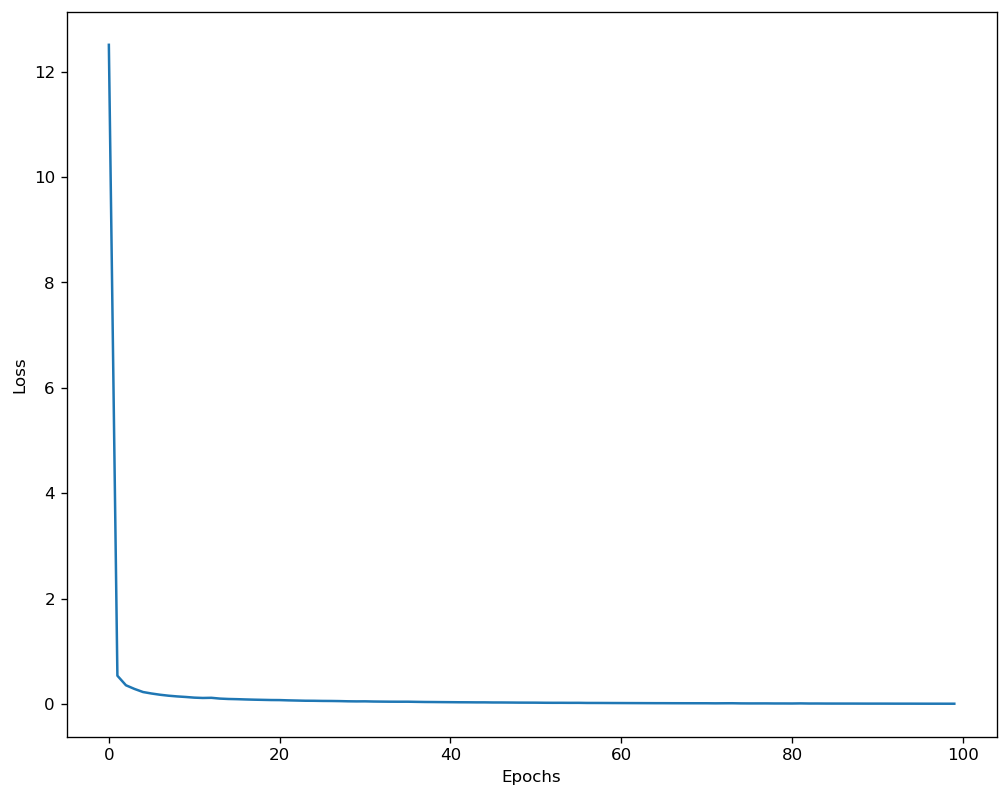

In [6]:
plt.figure(figsize=[10, 8], dpi=120)
plt.plot(mnist_loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('imgs/MNIST_loss.png')

Let's look at the accuracy we obtained on beth train and test set:

In [7]:
nn_mnist.score(x_train_flatten, y_train, accuracy=True)

0.99825

In [8]:
nn_mnist.score(x_test_flatten, y_test, accuracy=True)

0.959

And we got **95.9%** test accuracy. That's pretty good for our home-made neural network.

Now we move to the second example i nwhich we use our neural network for a regression problem.  
We will use this time the california housing dataset that comes with sklearn package. The dataset consists of 20640 samples of 8 predictive attributes and the target variable which is ln(median house value). This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data.

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [11]:
x, y = fetch_california_housing(return_X_y=True)
y = y.reshape((-1, 1)) # Turn it into column vector

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [13]:
x_mean = np.mean(x_train, 0)
x_std_dev = np.std(x_train, 0)

In [14]:
x_train = (x_train-x_mean)/x_std_dev # Normalize input data

This time we will use mean squared error as loss function.

In [15]:
n_features = x_train.shape[1]

nn_housing = NeuralNetwork(
    layers=[n_features, 100, 20, 1],
    hidden_activation=(relu, d_relu),
    output_activation=(identity, d_identity),
    loss=(mean_squared_error, d_mean_squared_error),
    optimizer=SGD()
)

housing_loss_hist = nn_housing.fit(
    x=x_train,
    y=y_train,
    batch_size=512,
    epochs=100
)

Epoch 1/100

13828/13828 ; loss=3.7647701135292206

Epoch 2/100

13828/13828 ; loss=1.0294524556483018

Epoch 3/100

13828/13828 ; loss=0.7044440641362282

Epoch 4/100

13828/13828 ; loss=0.6616619545593869

Epoch 5/100

13828/13828 ; loss=0.5916946073199872

Epoch 6/100

13828/13828 ; loss=0.5673903799701314

Epoch 7/100

13828/13828 ; loss=0.5879069506772302

Epoch 8/100

13828/13828 ; loss=0.5422342113923398

Epoch 9/100

13828/13828 ; loss=0.5307002418247115

Epoch 10/100

13828/13828 ; loss=0.5163956691705324

Epoch 11/100

13828/13828 ; loss=0.5124290132834365

Epoch 12/100

13828/13828 ; loss=0.4992974926612819

Epoch 13/100

13828/13828 ; loss=0.4928684300771594

Epoch 14/100

13828/13828 ; loss=0.51901308596291645

Epoch 15/100

13828/13828 ; loss=0.48239781644431295

Epoch 16/100

13828/13828 ; loss=0.48373715417385016

Epoch 17/100

13828/13828 ; loss=0.47435528696949366

Epoch 18/100

13828/13828 ; loss=0.46550719567418486

Epoch 19/100

13828/13828 ; loss=0.533224478574344

Let's plot the loss during training.

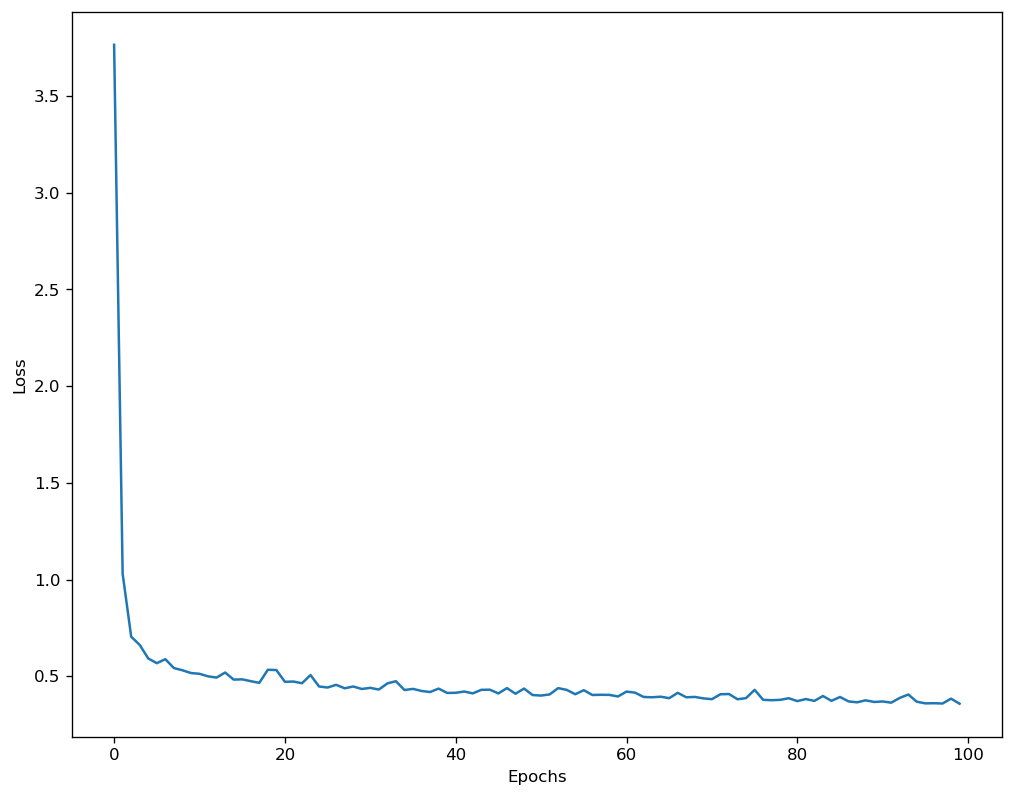

In [17]:
plt.figure(figsize=[10, 8], dpi=120)
plt.plot(housing_loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('imgs/Housing_loss.png')

Let's see what is our final loss value for training and test sets.

In [18]:
nn_housing.score(x_train, y_train)

0.36765906396499665

In [19]:
x_test = (x_test-x_mean)/x_std_dev

In [20]:
nn_housing.score(x_test, y_test)

0.3636493938031499

Note that the target variable is on a logarithmic scale. So, the interpretation of the mean squared error is a little not intuitive here. We usually say that the predicted values are off on average by +/- square root of MSE. Now, in our case, the median house values predicted by our network are off on average by a factor (instead of +/- we have multiplication/division) of e to the square root of MSE (in our cas this factor is about 1.83).

I hope you found this information useful and thanks for reading.

## References
[1] Cybenko, G.V. (2006). "Approximation by Superpositions of a Sigmoidal function". In van Schuppen, Jan H. (ed.). Mathematics of Control, Signals, and Systems. Springer International. pp. 303–314.

### Code used to generate images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x_a = np.random.uniform(-3, 3, (1, 200))
y_a = x_a**2 + np.random.normal(size=(1, 200))
theta = -np.pi/2
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
x_a, y_a = np.split(np.matmul(R, np.concatenate([x_a, y_a], axis=0)), [1], axis=0)

In [15]:
x_b = np.random.normal(7, 1, size=(100,))
y_b = np.random.normal(0, 0.4, size=(100,))

In [ ]:
np.save('plots_data/x_a')
np.save('plots_data/y_a')
np.save('plots_data/x_b')
np.save('plots_data/y_b')

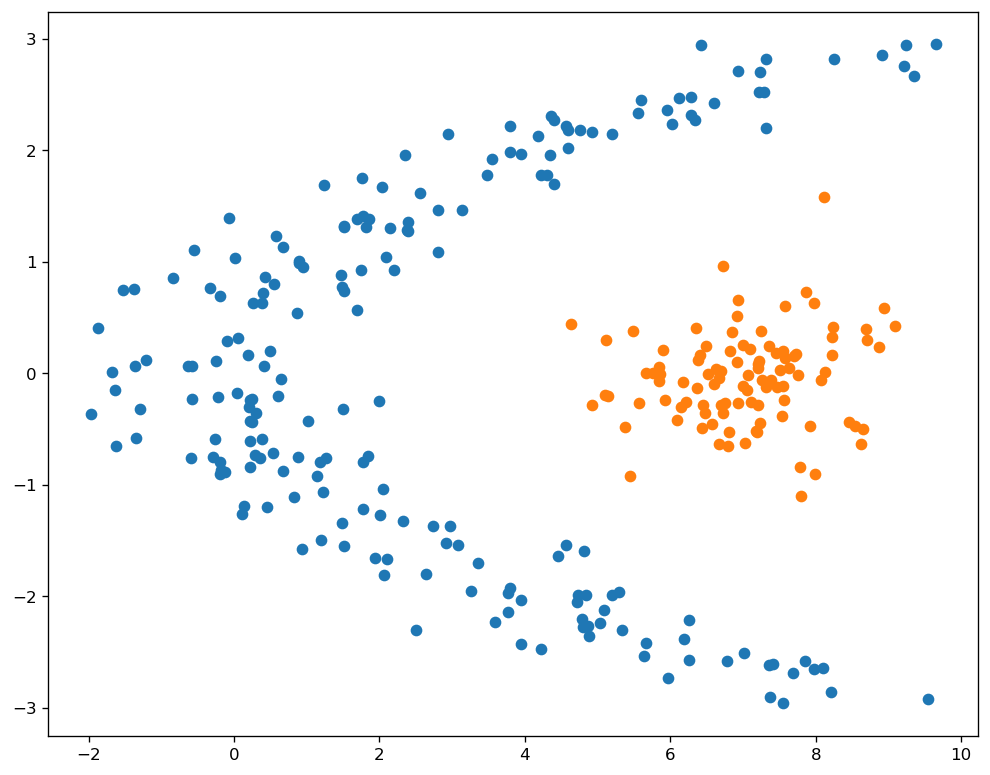

In [63]:
plt.figure(figsize=[10, 8], dpi=120)
plt.scatter(x_a, y_a)
plt.scatter(x_b, y_b)
plt.savefig('plot1.png')

In [45]:
x = np.linspace(1.6, 10, 100)

In [48]:
y1 = 0.32*x-0.5
y2 = -0.32*x+0.6

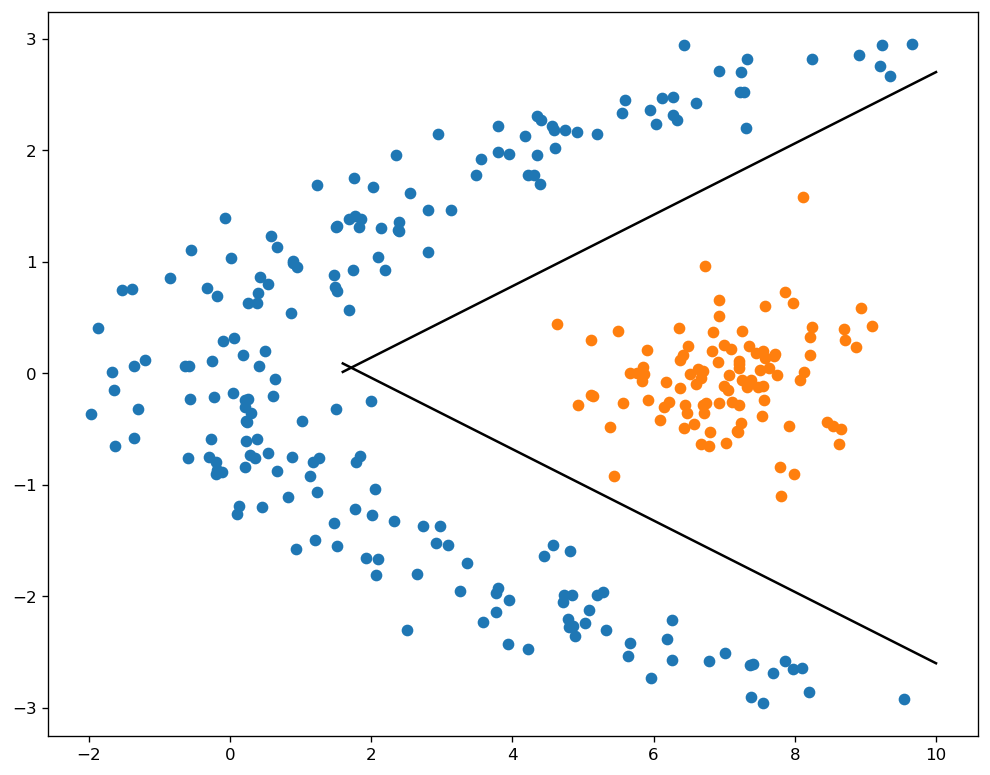

In [66]:
plt.figure(figsize=[10, 8], dpi=120)

plt.scatter(x_a, y_a)
plt.scatter(x_b, y_b)

plt.plot(x, y1, color='black')
plt.plot(x, y2, color='black')

plt.savefig('plot2.png')

In [51]:
np.save('x_a', x_a)
np.save('y_a', y_a)
np.save('x_b', x_b)
np.save('y_b', y_b)

In [67]:
n1_a = 0.32*x_a - y_a - 0.5
n2_a = -0.32*x_a - y_a + 0.6

n1_b = 0.32*x_b - y_b - 0.5
n2_b = -0.32*x_b - y_b + 0.6

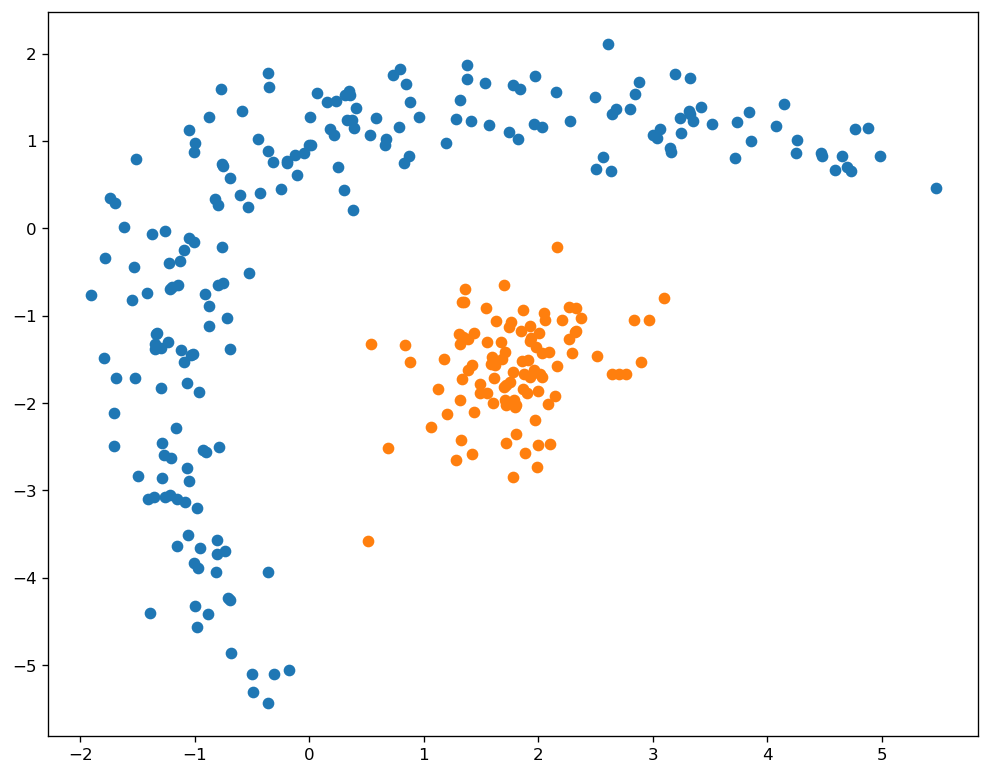

In [69]:
plt.figure(figsize=[10, 8], dpi=120)

plt.scatter(n1_a, n2_a)
plt.scatter(n1_b, n2_b)

plt.savefig('plot3.png')

In [90]:
def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return (np.exp(2*x) - 1)/(np.exp(2*x) + 1)

In [98]:
n1_a = relu(0.32*x_a - y_a - 0.5)
n2_a = relu(-0.32*x_a - y_a + 0.6)

n1_b = relu(0.32*x_b - y_b - 0.5)
n2_b = relu(-0.32*x_b - y_b + 0.6)

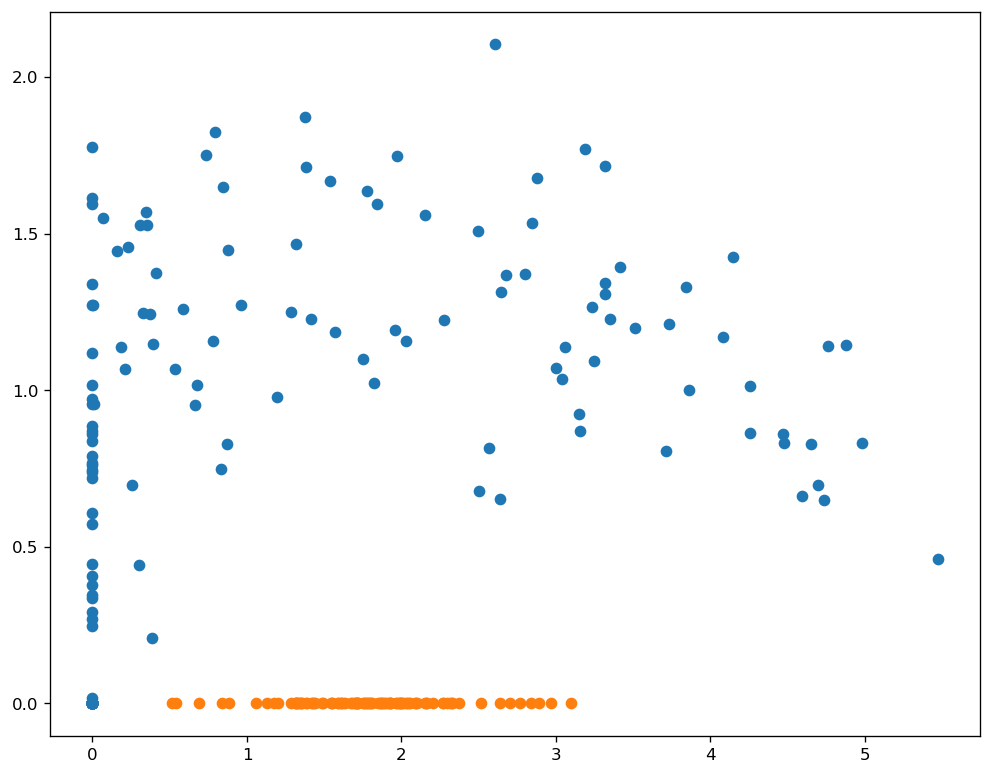

In [99]:
plt.figure(figsize=[10, 8], dpi=120)

plt.scatter(n1_a, n2_a)
plt.scatter(n1_b, n2_b)

plt.savefig('plot4_relu.png')

In [100]:
x = np.linspace(0, 6, 100)
y = 0.085*x-0.02

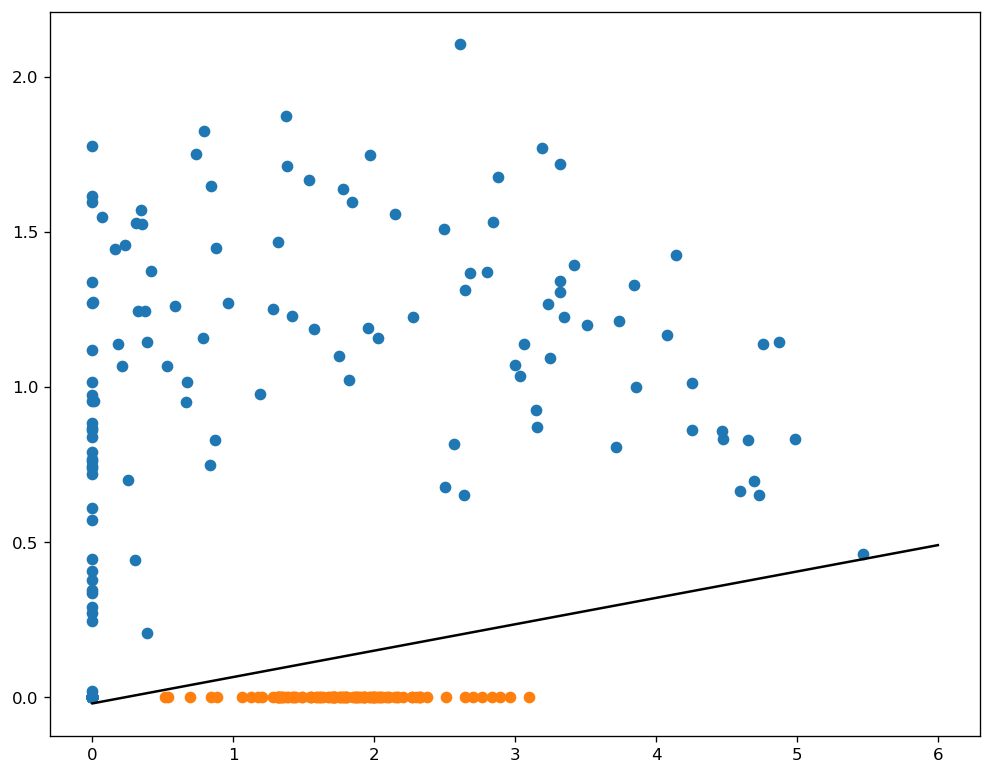

In [101]:
plt.figure(figsize=[10, 8], dpi=120)

plt.scatter(n1_a, n2_a)
plt.scatter(n1_b, n2_b)

plt.plot(x, y, color='black')

plt.savefig('plot5_relu_boundary.png')

In [102]:
n1_a = tanh(0.32*x_a - y_a - 0.5)
n2_a = tanh(-0.32*x_a - y_a + 0.6)

n1_b = tanh(0.32*x_b - y_b - 0.5)
n2_b = tanh(-0.32*x_b - y_b + 0.6)

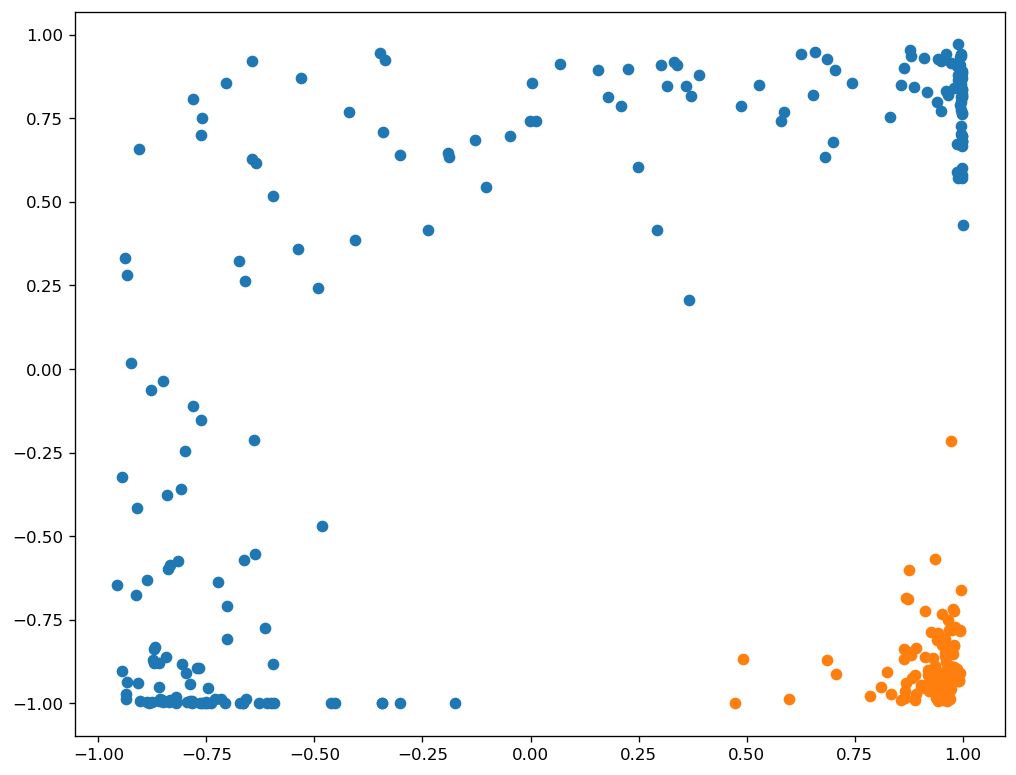

In [103]:
plt.figure(figsize=[10, 8], dpi=120)

plt.scatter(n1_a, n2_a)
plt.scatter(n1_b, n2_b)

plt.savefig('plot6_tanh.png')

In [106]:
x = np.linspace(0, 1, 100)
y = 1.05*x - 1

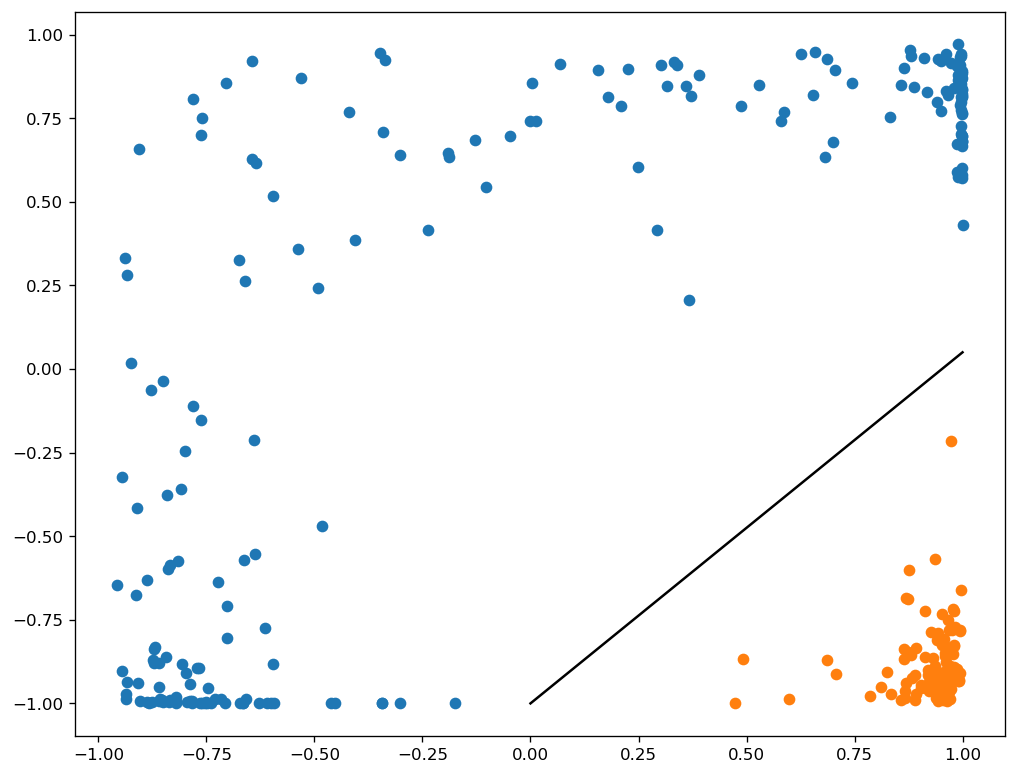

In [107]:
plt.figure(figsize=[10, 8], dpi=120)

plt.scatter(n1_a, n2_a)
plt.scatter(n1_b, n2_b)

plt.plot(x, y, color='black')

plt.savefig('plot7_tanh_boundary.png')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return (np.exp(2*x) - 1)/(np.exp(2*x) + 1)

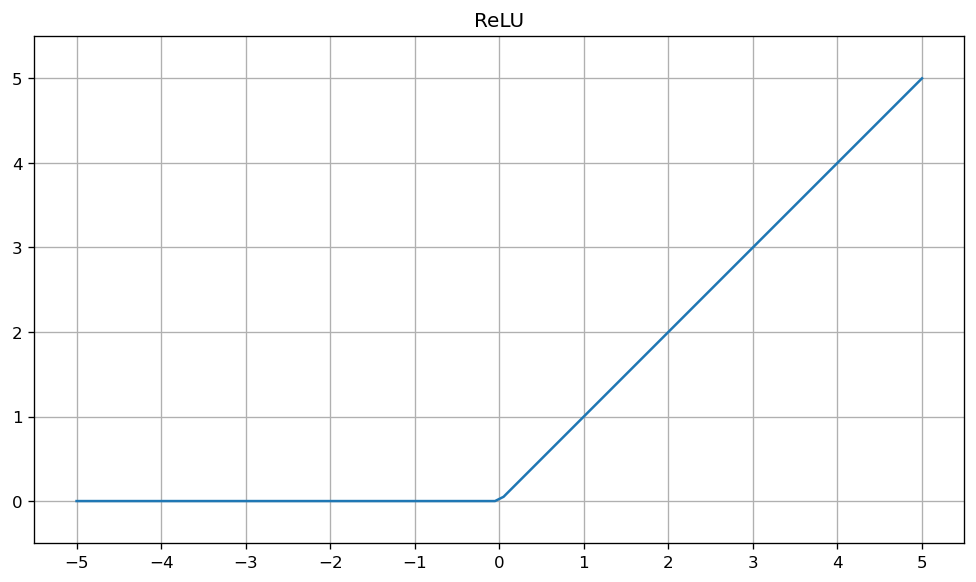

In [31]:
x = np.linspace(-5, 5, 100)
plt.figure(figsize=[10, 10], dpi=120)
plt.plot(x, relu(x))
plt.grid()
plt.xlim(-5.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.xticks(list(range(-5, 6)))
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ReLU')
plt.savefig('relu.png')

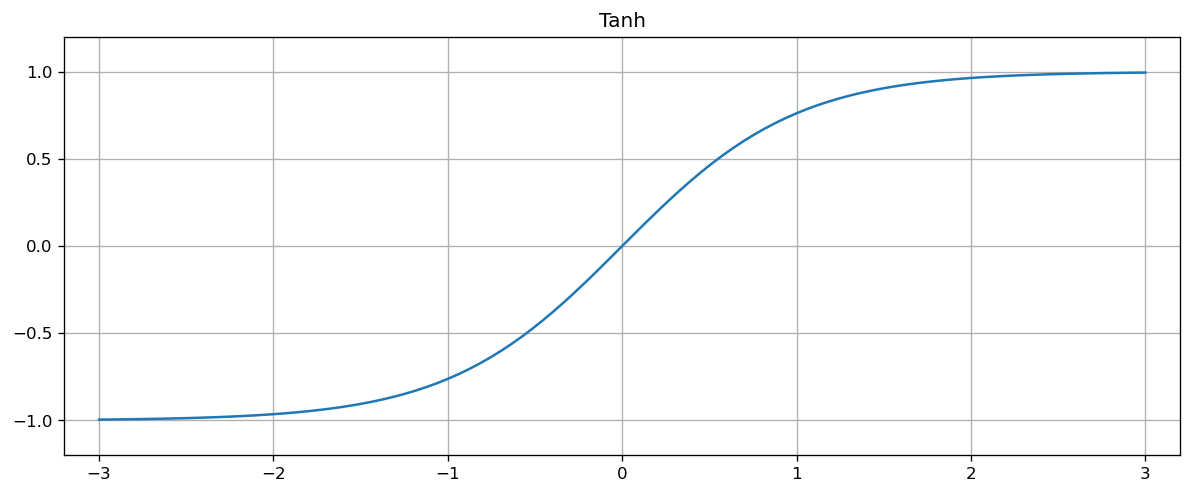

In [32]:
x = np.linspace(-3, 3, 100)
plt.figure(figsize=[12, 12], dpi=120)
plt.plot(x, tanh(x))
plt.grid()
plt.xlim(-3.2, 3.2)
plt.ylim(-1.2, 1.2)
plt.xticks(list(range(-3, 4)))
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tanh')
plt.savefig('tanh.png')